In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install krwordrank

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import krwordrank
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

데이터 주소

In [7]:
d = "E:\TextRank\daily.txt"

데이터 전처리(엔터를 기준으로 한 문장으로 인식)

In [14]:
def get_texts(d):
    with open(d, encoding='utf-8') as f:
        docs = [doc.replace('\n','').split('\n') for doc in f]
        if not docs:
            return []
        
        texts = docs
        texts = list(texts)
        texts = np.squeeze(texts)
        return texts
texts = get_texts(d)

In [15]:
print(texts)

['사랑해,처음 본 그 순간부터 사랑했고 너가 다른 남자와 행복하게 연애를 하는 순간에도 사랑했어.'
 ' 나는 너의 친한 친구이고 대학에서 만난 사람 중 가장 가까운 사람 중 하나다.'
 '널 사랑하지만 더 이상 다가가진 않을 것이다. 지금의 나는 너를 감당할 수 없기 때문이다.'
 '나는 잘 알고 있다, 예쁘고 착하고 다재다능한 너를 좋아하는 사람들이 얼마나 많은지.' '넌 뭘 먹고 자랐는지 그렇게 예쁠까.'
 '잘하는건 또 왜 그렇게 많은지.'
 '너의 글, 그림, 목소리, 생각, 말투, 춤, 흥얼거리는 노래, 작은 투정들, 시시콜콜한 얘기들, 작은 손, 동그란 얼굴, 취미, 꿈, 습관들... 그 모든 것을 사랑한다.'
 '너는 다정하다, 너는 상냥하고 따뜻하다.' '사랑스럽다.' '사랑스럽고 사랑스럽다.' '너를 마다할 남자가 있을까? 없다.'
 '너의 옆에는 항상 누군가 있었다.' '헤어졌다해도 바로 새로 생기는것을 보면 넌 정말로 모두에게 사랑스러운 사람인가보다.'
 '너의 주변만 봐도 알 수 있다.' '너가 얼마나 사랑받는 사람인지, 얼마나 많은 사람들이 너의 사랑을 받고싶어하는지.'
 '나도 그렇다.' '너의 사랑을 갖고싶다.'
 '눈을 뜨면 가장 먼저 보일 얼굴이 너의 그 예쁜 얼굴이었으면 좋겠고 잠들기전 마지막으로 볼 얼굴도 그 얼굴이었으면 좋겠다.'
 '너는 사랑스럽기도 하지만 가끔은 까칠하다.' '갑자기 날을 세우고 제멋대로 군다.' '바람같다.'
 '따뜻하게 보듬어주다가도 순식간에 태풍으로 변해 나를 숨막히게 한다.' '너는 네 자신이 변덕스럽다고 말한다.'
 '나는 그것마저 사랑한다.' '너의 따뜻함도 차가움도 모두 사랑한다.' '너의 밝음과 어두움, 그 모든 것을 사랑한다.'
 '애초에 너는 나의 삶을 파괴하고 들어왔었다.' '넌 나의 파괴적인 사랑이다.'
 '너의 섬세하고 거친 모습들, 한없이 사랑스럽다가도 한없이 차가워지는 모습들, 뭐 하나 놓치고 싶지 않다. 너의 존재 그 자체를 사랑해.'
 '그래서 나는 기다린다. 내가 너의 

krwordrank로 문장요약, 키워드 추출

In [19]:
from krwordrank.sentence import summarize_with_sentences
penalty = lambda x:0 if (25 <= len(x) <= 50) else 1
stopwords = {'은', '는', '이', '가', '오늘'}
keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.7,
    num_keywords=10,
    num_keysents=1,
    scaling=lambda x:1,
    verbose=False,
)
keyword = []

for sent in sents:
    print(sent)
for i in keywords:
    keyword.append(i)
print(keyword)

너는 나의 첫사랑이자 끝사랑이 되고 나는 너의 끝사랑이 되고싶다.
['너의', '너는', '나는', '사랑', '너를', '나의', '사람이', '되고', '순간', '마음']


워드 클라우드

In [20]:
def daily_wordcloud(d):
        f = open(d, 'r',encoding='UTF8')
        data = f.read()
        
        engine = Okt() 
        nouns1 = engine.nouns(data)
        nouns1 = [n for n in nouns1 if len(n) > 1]

        # Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 40개
        count = Counter(nouns1)
        tags = count.most_common(100)
        
        # 워드 클라우드 배경 사진
        book_mask = np.array(Image.open('1.png'))

        # WordCloud, matplotlib: 단어 구름 그리기
        font_path = 'E:\TextRank\KBLZ.ttf'
        wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600, mask=book_mask)
        cloud = wc.generate_from_frequencies(dict(tags))
        plt.figure(figsize=(10,8))
        plt.axis('off')
        plt.imshow(cloud)

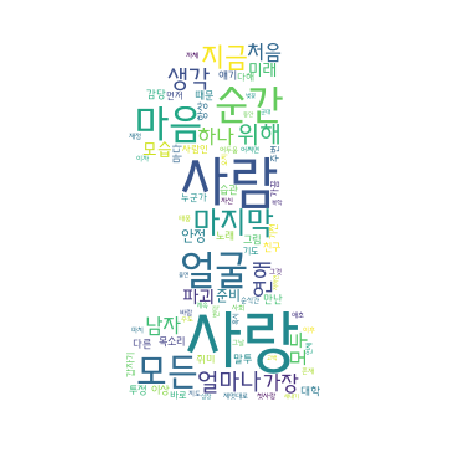

In [21]:
daily_wordcloud(d)